## Notebook for data analysis of 'interneuron' sessions [mostly local photostimulation of random groups while imaging interneuron + excitatory responses]

In [3]:
%run ./rob_setup_notebook.ipynb

import utils.utils_funcs as uf
import utils.gsheets_importer as gsi
import utils.ia_funcs as ia 
from utils.paq2py import *

session_type = 'interneuron'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Suite2p path: ['/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/suite2p']
QNAP_path: /home/rlees/mnt/qnap 
QNAP_data_path /home/rlees/mnt/qnap/Data 
Pickle folder: /home/rlees/mnt/qnap/pkl_files 
Master pickle: /home/rlees/mnt/qnap/master_pkl/master_obj.pkl 
Figure save path: /home/rlees/mnt/qnap/Analysis/Figures 
STA movie save path: /home/rlees/mnt/qnap/Analysis/STA_movies 
S2 borders path: /home/rlees/mnt/qnap/Analysis/S2_borders


## Load pickle file for single session

In [85]:
# pkl_files = [
#             '2021-01-06_RL120.pkl',
#             '2021-01-20_RL121.pkl',
#             '2021-01-20_RL124.pkl',
#             '2021-01-20_RL125.pkl',
#             '2021-01-28_RL124.pkl'
#             ]

Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-28_RL124.pkl
2021-01-28_RL124
number of interneurons: 109
searching for interneuron cell ids...
search completed.
Number of interneuron cells:  83


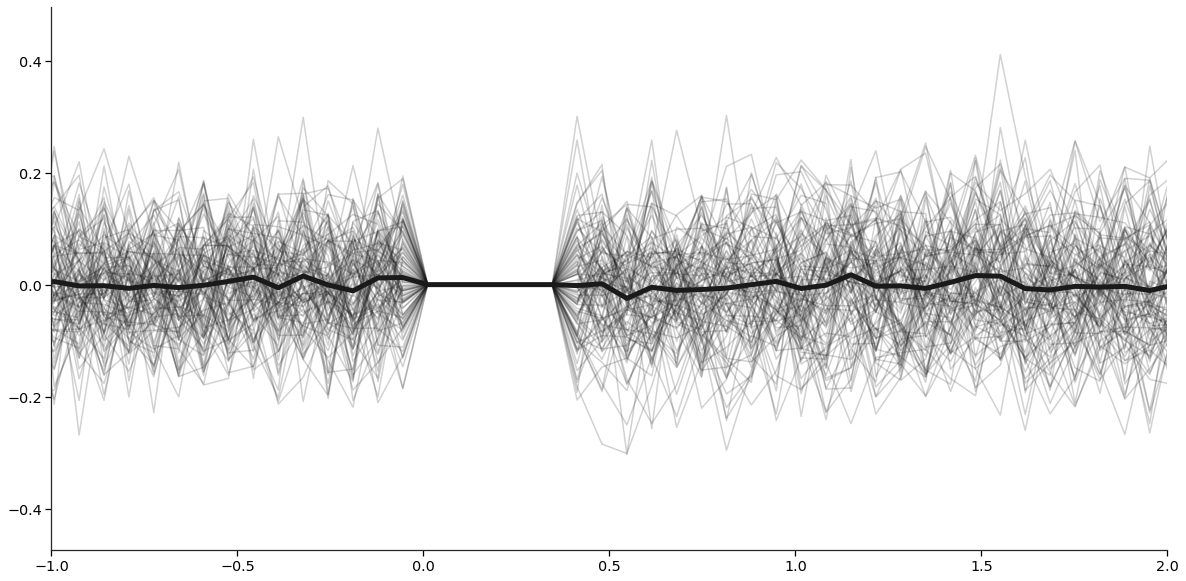

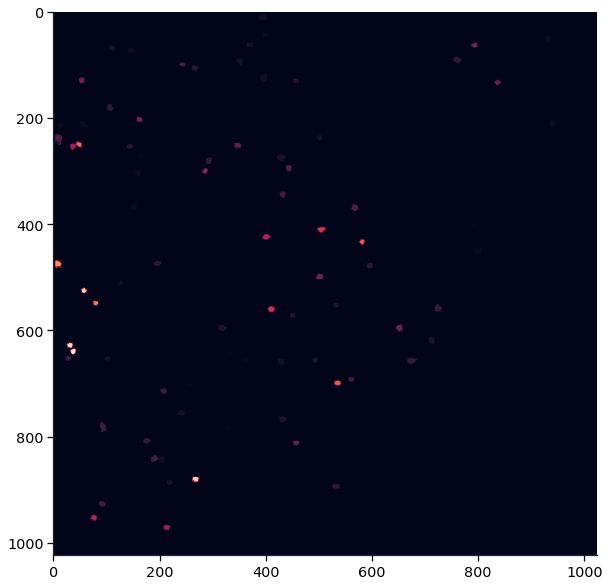

In [10]:
pkl_files = ia.listdirFullpath(pkl_folder + '/interneuron', '28_RL124.pkl')

session_ids = [pkl.split('/')[-1][:-4] for pkl in pkl_files]

for pkl, session_id in zip(pkl_files, session_ids):
    
    ses_obj = ia.loadPickle(pkl)
    
findInterneurons(ses_obj, plot=True)

# Find interneurons from manual annotations, plot response and ROI masks

In [16]:
# manually pick out tdtomato cells in imagej
# load in points from imagej to python (maybe using target approach?)
# use points to assign new information to cells in the exp_objs, i.e. 'interneuron_id' = True/False
# plot activity of interneurons vs excitatory neurons on photostim and spont trials (all or subset?)
# add this metric to dataframe creation

def findInterneurons(ses_obj, plot=True):

    exp_obj = ses_obj.photostim_r
    print(exp_obj.sheet_name)

    interneuron_points = ia.listdirFullpath(ses_obj.photostim_r.tiff_path, 'interneurons') 
    interneuron_img = tf.imread(interneuron_points)

    interneuron_coords = np.where(interneuron_img>0)
    interneuron_img[interneuron_coords] = 1 # [y,x] coords

    n_interneurons = len(interneuron_coords[0])

    print('number of interneurons:', n_interneurons)

    print('searching for interneuron cell ids...')

    # make an image of every cell area, filled with the index of that cell
    cell_img = np.zeros_like(interneuron_img, dtype='uint16')

    cell_x = np.array(exp_obj.cell_x)
    cell_y = np.array(exp_obj.cell_y)

    for i, coord in enumerate(zip(cell_y[0], cell_x[0])):
        cell_img[coord] = i+1

    # binary mask x cell image to get the cells that overlap with target areas
    interneuron_cells = cell_img*interneuron_img

    interneuron_cells = np.unique(interneuron_cells)[1:]-1 # correct the cell id due to zero indexing

    exp_obj.interneurons = np.zeros([exp_obj.n_units[0]], dtype='bool')
    exp_obj.interneurons[interneuron_cells] = True 

    exp_obj.n_interneurons = np.sum(exp_obj.interneurons)

    print('search completed.')
    print('Number of interneuron cells: ', exp_obj.n_interneurons)

    interneuron_trials = exp_obj.all_trials[0][exp_obj.interneurons]
    interneuron_cell_ids = [exp_obj.cell_id[0][i] for i,b in enumerate(exp_obj.interneurons) if b]
    
    if plot:
        
        plt.figure(figsize=(20,10))
        plt.plot(exp_obj.time, np.mean(interneuron_trials, axis=(0)), 'k', alpha=0.2)
        plt.plot(exp_obj.time, np.mean(interneuron_trials, axis=(0,2)), 'k', lw=5)
        plt.xlim([-1,2])
        plt.show()

        plt.figure(figsize=(10,10))
        plt.imshow(ia.s2pMasks(exp_obj.s2p_path, interneuron_cell_ids));
        
    return exp_obj

## Save the interneuron ROI masks image

In [41]:
# save_path = os.path.join(exp_obj.tiff_path, exp_obj.sheet_name + '_interneuron_ROI_masks.tif')
# tf.imwrite(save_path, ia.s2pMasks(exp_obj.s2p_path, interneuron_cell_ids))

## Plot entire timeseries of single interneurons to check trace fidelity

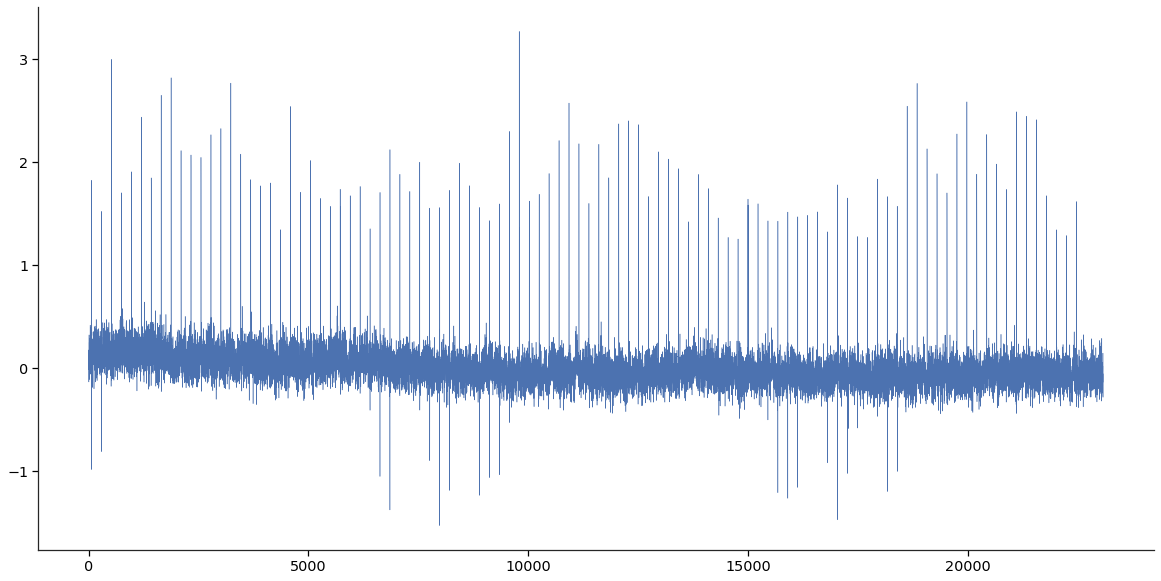

In [84]:
int_traces = exp_obj.dfof[0][exp_obj.interneurons][20]
plt.figure(figsize=(20,10))
plt.plot(int_traces.T, lw=0.5);
# plt.xlim([11000,12000]);
# plt.ylim([-1,5]);

## Plot distance from nearest responding target vs. amplitude of response of interneurons

Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-06_RL120.pkl
2021-01-06_RL120
number of interneurons: 42
searching for interneuron cell ids...
search completed.
Number of interneuron cells:  37
Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-20_RL121.pkl
2021-01-20_RL121
number of interneurons: 33
searching for interneuron cell ids...
search completed.
Number of interneuron cells:  28
Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-20_RL125.pkl
2021-01-20_RL125
number of interneurons: 29
searching for interneuron cell ids...
search completed.
Number of interneuron cells:  25
Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-20_RL124.pkl
2021-01-20_RL124
number of interneurons: 46
searching for interneuron cell ids...
search completed.
Number of interneuron cells:  34
Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-28_RL124.pkl
2021-01-28_RL124
number of interneurons: 109
searching for interneur

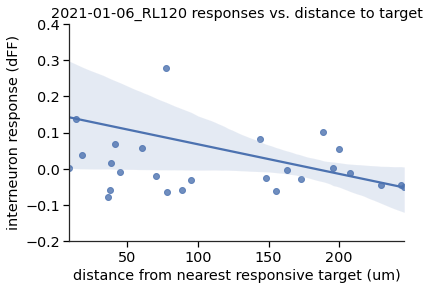

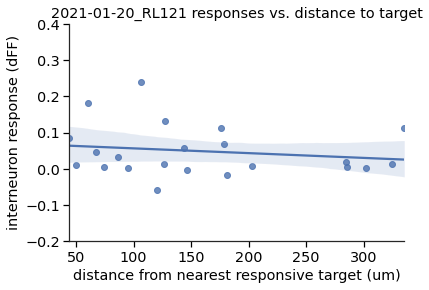

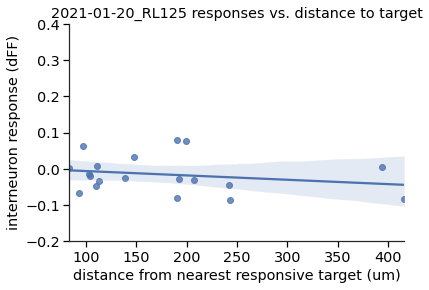

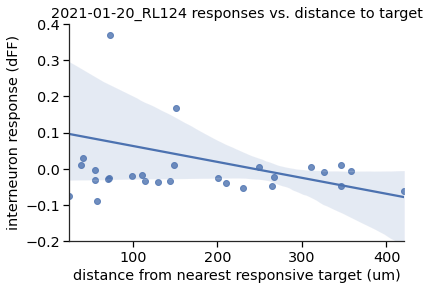

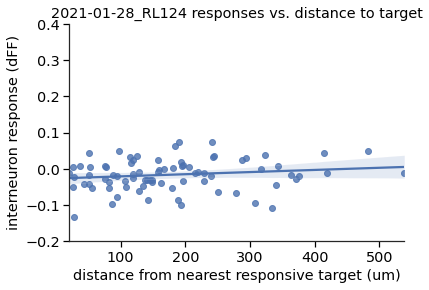

In [17]:
# coords of the non interneuron targeted cells that responded (sta_sig)
# coords of interneurons and their response amplitudes
# scatter response vs distance

pkl_files = ia.listdirFullpath(pkl_folder + '/interneuron', '.pkl')
session_ids = [pkl.split('/')[-1][:-4] for pkl in pkl_files]

for pkl, session_id in zip(pkl_files, session_ids):
    
    ses_obj = ia.loadPickle(pkl)
    
    exp_obj = findInterneurons(ses_obj, plot=False)
    
    exc_cell_meds = np.array(exp_obj.cell_med[0])[~exp_obj.interneurons & exp_obj.targeted_cells & exp_obj.sta_sig[0]]
    exc_coord = [(cell_med[0], cell_med[1]) for cell_med in exc_cell_meds]

    nontarg_interneurons = exp_obj.interneurons & ~exp_obj.targeted_cells
    inh_cell_meds = np.array(exp_obj.cell_med[0])[nontarg_interneurons]
    inh_coord = [(cell_med[0], cell_med[1]) for cell_med in inh_cell_meds]

    inh_resp_amps = exp_obj.sta_amplitudes[0][nontarg_interneurons]

    tree = spatial.KDTree(exc_coord)
#     tree = spatial.KDTree(exp_obj.target_coords)
    
    inh_dists = []
    indexes = []

    for coord in inh_coord:
        # Distance from and index of nearest neighbour target
        dist, index = tree.query(coord)
        inh_dists.append(dist)
        indexes.append(index)
    
    plt.figure();
    sns.regplot(x=inh_dists, y=inh_resp_amps);
    plt.xlabel('distance from nearest responsive target (um)')
    plt.ylabel('interneuron response (dFF)')
    plt.title(session_id + ' responses vs. distance to target')
    plt.ylim([-0.2, 0.4])

Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-06_RL120.pkl
2021-01-06_RL120
number of interneurons: 42
searching for interneuron cell ids...
search completed.
Number of interneuron cells:  37
Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-20_RL121.pkl
2021-01-20_RL121
number of interneurons: 33
searching for interneuron cell ids...
search completed.
Number of interneuron cells:  28
Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-20_RL125.pkl
2021-01-20_RL125
number of interneurons: 29
searching for interneuron cell ids...
search completed.
Number of interneuron cells:  25
Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-20_RL124.pkl
2021-01-20_RL124
number of interneurons: 46
searching for interneuron cell ids...
search completed.
Number of interneuron cells:  34
Loading pickle: /home/rlees/mnt/qnap/pkl_files/interneuron/2021-01-28_RL124.pkl
2021-01-28_RL124
number of interneurons: 109
searching for interneur

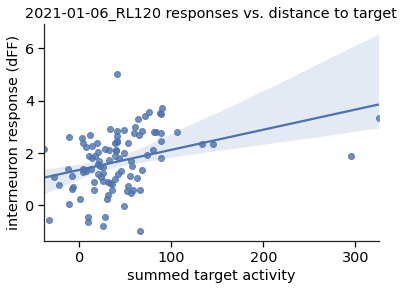

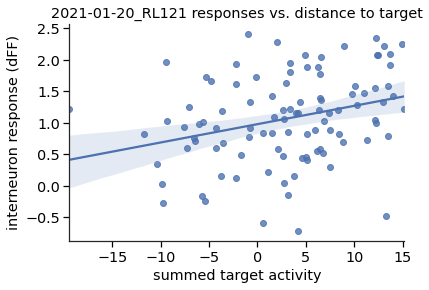

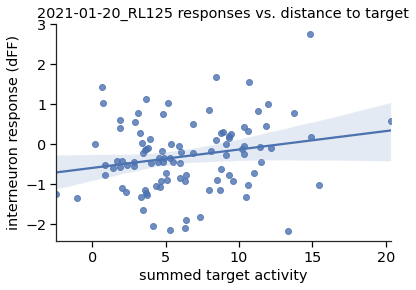

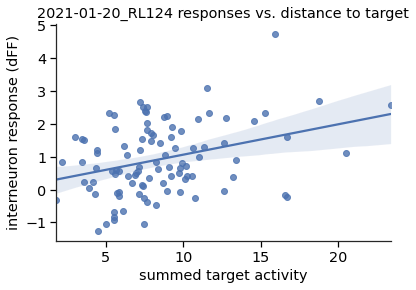

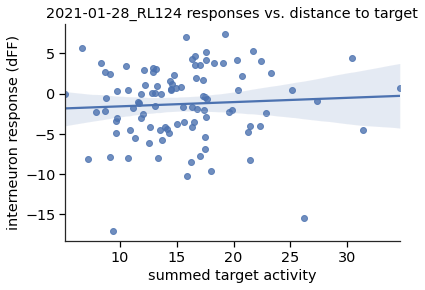

In [29]:
pkl_files = ia.listdirFullpath(pkl_folder + '/interneuron', '.pkl')
session_ids = [pkl.split('/')[-1][:-4] for pkl in pkl_files]

for pkl, session_id in zip(pkl_files, session_ids):
    
    ses_obj = ia.loadPickle(pkl)
    
    exp_obj = findInterneurons(ses_obj, plot=False)

    nontarg_interneurons = exp_obj.interneurons & ~exp_obj.targeted_cells
    
    inh_resp_amp_sum = exp_obj.all_amplitudes[0][nontarg_interneurons].sum(axis=0)
    targ_resp_amp_sum = exp_obj.all_amplitudes[0][exp_obj.targeted_cells].sum(axis=0)
    
    plt.figure();
    sns.regplot(x=targ_resp_amp_sum, y=inh_resp_amp_sum);
    plt.xlabel('summed target activity')
    plt.ylabel('interneuron response (dFF)')
    plt.title(session_id + ' responses vs. distance to target')

## Mean distance of interneurons from nearest target area (i.e. spot of light)

In [119]:
# distance of interneurons from targets (average)
# subsample using np.random.choice to get exc neurons with similar average (+/- 10 um?)
# plot responses of those neurons as a comparison

cell_meds = np.array(exp_obj.cell_med[0])[exp_obj.interneurons & ~exp_obj.targeted_cells]
interneuron_coords = [(cell_med[0], cell_med[1]) for cell_med in cell_meds]

tree = spatial.KDTree(exp_obj.target_coords)

inh_dists = []
indexes = []

for coord in interneuron_coords:
    # Distance from and index of nearest neighbour target
    dist, index = tree.query(coord)
    inh_dists.append(dist)
    indexes.append(index)
    
mean_int_target_dist = np.mean(inh_dists)

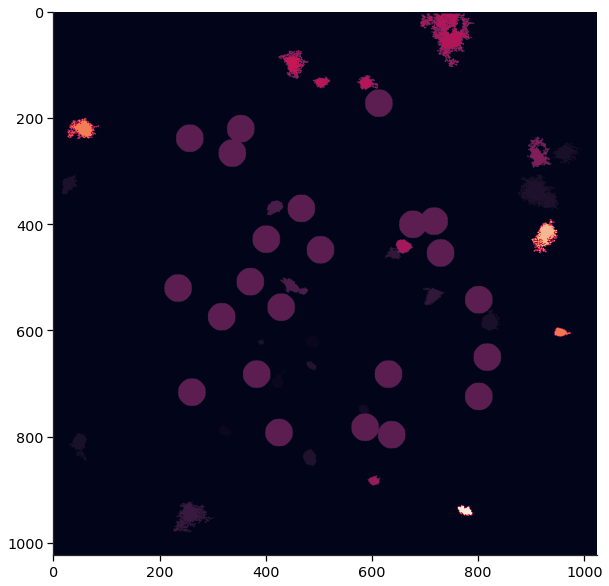

In [74]:
inh_neurons = np.where(exp_obj.interneurons & ~exp_obj.targeted_cells)[0]
inh_neuron_cell_ids = np.array(exp_obj.cell_id[0])[inh_neurons]

plt.figure(figsize=(10,10))
plt.imshow(ia.getTargetImage(exp_obj) + ia.s2pMasks(exp_obj.s2p_path, inh_neuron_cell_ids));

## Troubleshooting

In [87]:
exp_obj.target_coords # y then x

[(315, 273),
 (335, 387),
 (401, 285),
 (427, 227),
 (427, 395),
 (477, 629),
 (493, 379),
 (521, 677),
 (523, 585),
 (561, 473),
 (571, 533),
 (607, 261),
 (613, 617),
 (665, 321),
 (669, 567),
 (673, 499),
 (707, 633),
 (719, 477),
 (733, 413),
 (783, 473),
 (807, 307),
 (843, 513),
 (851, 331)]

In [88]:
indexes

[7, 0, 1, 16, 0, 3, 16, 20, 8, 21, 1, 11, 20, 7, 3, 0, 5, 11, 16]

In [89]:
interneuron_coords

[(477.0, 892.0),
 (347.0, 232.0),
 (77.0, 529.0),
 (761.0, 953.5),
 (119.5, 323.0),
 (501.0, 53.0),
 (828.0, 736.0),
 (745.0, 226.0),
 (469.0, 550.0),
 (925.0, 558.0),
 (157.0, 637.0),
 (602.0, 133.0),
 (746.0, 145.0),
 (443.0, 802.0),
 (465.0, 31.0),
 (307.0, 137.0),
 (214.0, 885.0),
 (646.0, 171.0),
 (857.0, 967.0)]

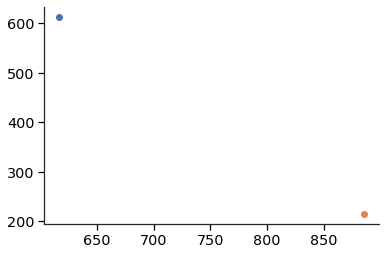

In [90]:
plt.scatter(exp_obj.target_coords[12][1], exp_obj.target_coords[12][0])
plt.scatter(interneuron_coords[16][1], interneuron_coords[16][0])

In [91]:
inh_dists

[219.45614596087302,
 52.009614495783374,
 294.4961799412685,
 325.01730723147654,
 201.79259153893634,
 189.08199279677586,
 158.90248582070703,
 102.00490184299969,
 64.35060217278468,
 93.53608929178085,
 306.8941185490527,
 128.09761902549164,
 173.1040149736568,
 147.33974345029924,
 199.64969321288726,
 136.23509092741122,
 367.02179771779225,
 98.08669634563088,
 366.1365865356807]

# Get 100 random subsets of exc neurons that match inh neurons in terms of distance from target areas

In [123]:
filter_exc = ~exp_obj.targeted_cells & ~exp_obj.interneurons

exc_neurons = np.where(filter_exc)[0]

mean_exc_dists = []
mean_resp_amplitudes = []

# plt.figure(figsize=(10,5))

for i in range(1,100):
    
    different_distributions = False

    while different_distributions is False:
        exc_neuron_sample = np.random.choice(exc_neurons, size=exp_obj.n_interneurons, replace=False)

        cell_meds = np.array(exp_obj.cell_med[0])[exc_neuron_sample]
        exc_coords = [(cell_med[0], cell_med[1]) for cell_med in cell_meds]

        tree = spatial.KDTree(exp_obj.target_coords)

        exc_dists = []
        indexes = []

        for coord in exc_coords:
            # Distance from and index of nearest neighbour target
            dist, index = tree.query(coord)
            exc_dists.append(dist)
            indexes.append(index)

        statistic, pvalue = stats.ks_2samp(inh_dists, exc_dists)

        if pvalue > 0.2: 
#             print('found similar set of excitatory neurons',
#                   '\nmean inhibitory distance:', np.mean(inh_dists),
#                   '\nmean excitatory distance:', np.mean(exc_dists))
            print(str(i) + ' of 100', end='\r')
            different_distributions = True
            
    mean_exc_dists.append(np.mean(exc_dists))
        
    exc_neuron_trials = exp_obj.all_trials[0][exc_neuron_sample]
    mean_trial = np.mean(exc_neuron_trials, axis=(0,2))
    mean_resp_amplitudes.append(np.mean(mean_trial[exp_obj.post_trial_frames]))

# plt.plot(exp_obj.time, np.mean(exc_neuron_trials, axis=(0)), 'k', alpha=0.2)
# plt.plot(exp_obj.time, np.mean(exc_neuron_trials, axis=(0,2)), 'k', lw=0.2)
# plt.xlim([-1,2])
# plt.show()

## Plot excitatory ROI masks with target areas

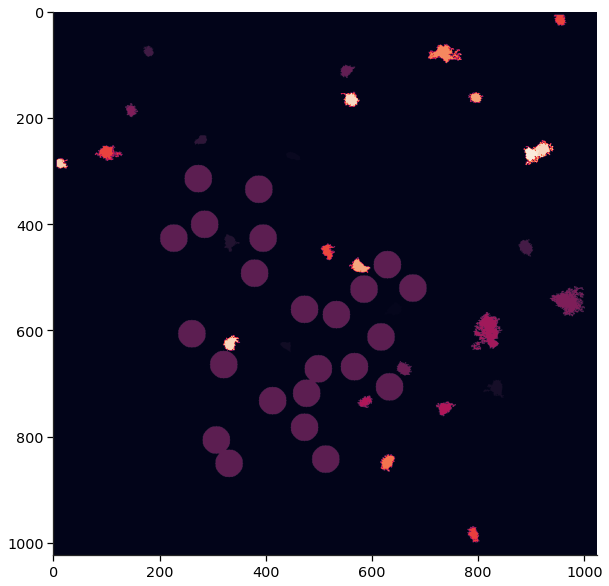

In [18]:
exc_neuron_cell_ids = np.array(exp_obj.cell_id[0])[exc_neuron_sample]

plt.figure(figsize=(10,10))
plt.imshow(ia.getTargetImage(exp_obj) + ia.s2pMasks(exp_obj.s2p_path, exc_neuron_cell_ids));

# Plot distribution of random exc neuron samples vs. inh neuron sample 

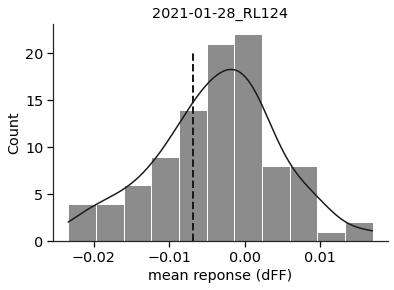

In [124]:
sns.histplot(mean_resp_amplitudes, kde=True, color='k')
mean_inh_trial = np.mean(interneuron_trials, axis=(0,2))
mean_inh_resp = np.mean(mean_inh_trial[exp_obj.post_trial_frames])
plt.vlines(mean_inh_resp, 0, 20, linestyle='--', color='k', lw=2);
plt.title(exp_obj.sheet_name);
plt.xlabel('mean reponse (dFF)');

In [125]:
stats.percentileofscore(mean_resp_amplitudes[:-1], mean_inh_resp)

30.612244897959183

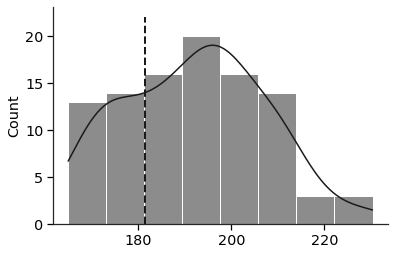

In [19]:
sns.histplot(mean_exc_dists, kde=True, color='k')
plt.vlines(mean_int_target_dist, 0, 22, linestyle='--', color='k', lw=2);

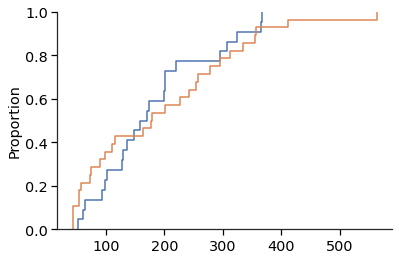

In [20]:
sns.ecdfplot(x=inh_dists);
sns.ecdfplot(x=exc_dists);